## Plant Power Output Regression 
From the provided dataset the target variable we wish to predict is PE (Power Output) based on various input variables: Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). PE, and all the features, are continuous numerical variables, therefore regression models are most suitable. Although classification algorithms could also be used, with value binning, this would lose significant information and produce an inferior result. Clustering would not be a suitable approach because this is a supervised learning problem.
The aim of regression algorithms is to learn a function  $f: V \rightarrow \mathbb{R}$ that maps the input variables to the output variable in the form of a real number. Our model will predict the output variable, in the form of a real number, given a vector of features.
The performance of the models will then be evaluated on both seen and unseen data. The model that performs best on unseen data will be the most suitable for a real world application.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

/var/folders/yw/qmvvfjd916v9cr0f447rhf700000gp/T/ipykernel_45165/3661424178.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


## Data Exploration
**Features :** Hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)

**Target :** Predict the net hourly electrical energy output (PE) of the plant.

In [2]:
# Here the data is loaded from the data folder in the code directory. df.info is used to check the data types, number of nulls and number of records in the data by column.
df = pd.read_csv("data/plant_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Understanding the data
From the above code we can see that all the data is numeric and there are no missing values. From a manual inspection of the data we can see that the data appears to be continuious. To gain a deeper understanding of the data distribution we can use density plots. 

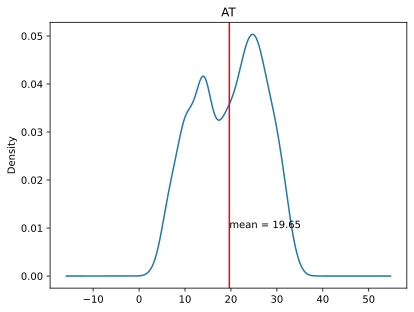

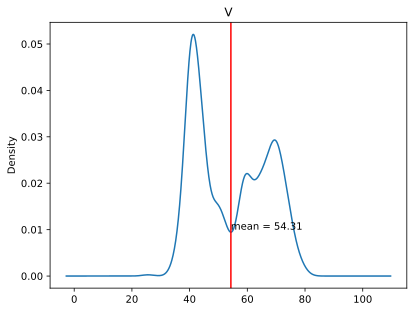

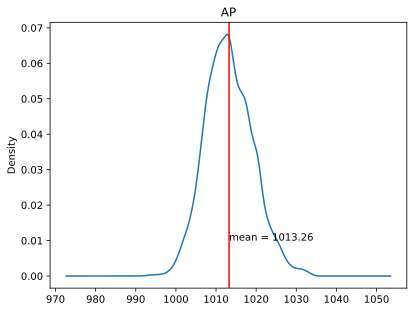

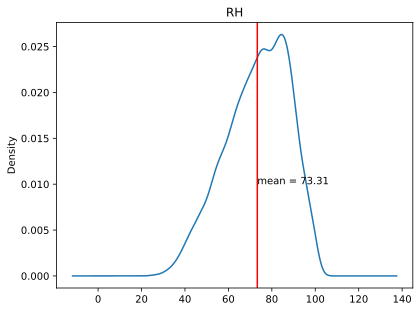

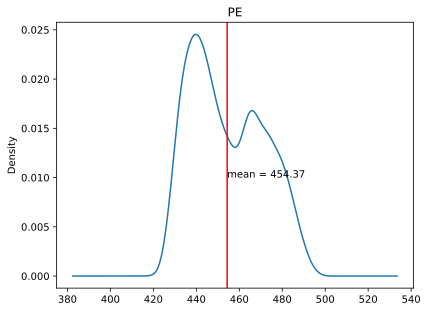

In [3]:
for col in df.columns:
    df[col].plot(kind='density')
    plt.axvline(df[col].mean(), color='red')
    plt.annotate('mean = {}'.format(round(df[col].mean(),2)), xy=(df[col].mean(), 0.01))
    plt.title(col)
    plt.show()

## Data Processsing
To prepare the data for training it is split into features $X$ and target variables $y$. These are then divided into train and test sets: $X_{train}$ and $y_{train}$ being the training dataset (containing $80 \% $ of the dataset, and $X_{test}$ and $y_{test}$ being the test dataset (containing $20 \%$ of the dataset) which will be used to evaluate performance on unseen data. During model optimisation the training set will be further split into validation datasets.

In [4]:
# Splitting into features X and targets y
X = df.drop('PE', axis=1)
y = df[['PE']]

# Performing a test train split (80% for Training 20% for Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Model
The DummyRegressor model used here from Sklearn acts as baseline model that utilises simple rules to make predictions for a regression task. The baseline model offers a performance metric that should be beaten by more sophisticated methods tested later. There are various strategies that can be used for this model: mean, median, quantile and constant. In this instance the mean strategy will be used (utilizing the mean value of the target from the training set). An instance of the DummyRegressor with the strategy ’mean’ is created and then fit to the training dataset. The fit model is then used to predict values from the $X_{test}$ set. 

In [5]:
dummy = DummyRegressor(strategy='mean')

# Fitting the model
dummy.fit(X_train, y_train)

# Predicting values for the test features
dummy_y_pred = dummy.predict(X_test)

# Predicting values for the train features
dummy_y_pred_train = dummy.predict(X_train)

## Model Selection 
To choose an appropriate model a selection of available approaches will be evaluated.


**Regression Models:** Predicting the net hourly electrical energy output based on the input features is a regression task. This is because the target variable has continuous values. Regression is a supervised learning, machine learning approach that will learn a model that best fits the training data (which is continuous) to provide a prediction for unseen data (that is also continuous).

**Linear Regression:** Linear regression offers a simple, powerful and versatile model to predict a numerical value based on numerical inputs. The relationship that is identified by the model is simple and therefore easy to interpret.

**Decision Tree Regressor:** A decision tree regressor is capable of handling the continuous variables and also modelling nonlinear relationships. The output from a decision tree regressor may also be understood easily. It is also worth noting that decision trees are more robust to outliers and irrelevant features as their structure can mitigate these.

**Neural Network:** Neural networks with a single output neuron can be used for regression tasks. A neural network is more complex than linear regression and a decision tree regressor but is not as easy to interpret. They have the advantage over linear regression that they can nativity model non-linear relationships. Neural networks also perform best with a large dataset which is where a neural network would be likely to out perform these other modelling techniques

## Linear Regression Model
The aim of regression is to learn a function $f: V \rightarrow \mathbb{R}$ with the assumption that $f$ has the form $f(\overrightarrow{x}) = \sum_{i=1}^{n} w_i x_i + w_0$. We choose $w_1, \dots, w_n,w_0$ to minimise the mean squared error (MSE). Using Sklearns' LinearRegression module a linear regression model is instantiated. For the first iteration no parameters are used. The model is then fit to the $X_{train}$ and $y_{train}$ partitions. The resulting model is then used to predict values for the $X_{test}$ data.

In [6]:
# Initiating the model
lin_reg_model = LinearRegression()

# Fitting the model
lin_reg_model.fit(X_train, y_train)

# Look at coef_ and intercept_
lin_reg_model.coef_ , lin_reg_model.intercept_

# Predicting values for the test features
lin_reg_y_pred=lin_reg_model.predict(X_test)

# Predicting values for the train features
lin_reg_y_pred_train=lin_reg_model.predict(X_train)

## Decision Tree Regression Model
From a high level perspective a decision tree regressor (DTR) has the same goal as linear regression. learning a function $f: V \rightarrow \mathbb{R}$ and optimising to minimise the MSE. The approach of a DTR however is different. During training DTR recursively splits the training data using some criterion, for example MSE, and selects the split that minimises MSE at each stage. The most significant split is used as the root node. To provide a prediction, feature inputs are used to flow through the decision tree until a leaf node is reached. When the node is reached an average of the dataset partition at that node is returned as the predicted value. Similar to the other modules in Sklearn, the model is instantiated using the DecisionTreeRegressor module, and then fit to the $X_{train}$ and $y_{train}$ dataset partitions. Predicted values for the test set are then obtained by using the $X_{test}$ dataset partition.

In [7]:
dt_reg_model = DecisionTreeRegressor()

# Fitting the model
dt_reg_model=dt_reg_model.fit(X_train, y_train) 

# Predicting values for the test features
dt_reg_ypred=dt_reg_model.predict(X_test)

dt_reg_ypred_train = dt_reg_model.predict(X_train)

## Model Scoring
When a model is produced we need to understand how well it performs at predicting an output value given a feature vector input. For classification tasks we could use: accuracy, precision, recall, f1 score etc. These provide a score based on the amount of correctly classified instances given some feature vectors. However, when it comes to regression these scores cannot be used; we have a numerical output and we want to understand how close this predicted value is to the true value. To measure performance we can use the following methods.

### Mean Square Error
$$MSE = \frac{1}{N} \sum^{N}_{i=1}(y_i - f(\overrightarrow{x_i}))^2$$
Given some feature vector inputs that have a known output we use a model to provide predicted values. We can then calculate the difference between the predicted and actual value and average across all the values using the formula above. This gives us an overall idea of how well our approach performs. There are also similar scoring methods such as root mean squared error and mean absolute error which put different amounts of emphasis on outliers. The value provided by MSE is specific to the problem, an MSE for one problem cannot be compared (in its base form) to other problems.

In [8]:
mse_dummy = mean_squared_error(y_test, dummy_y_pred)
mse_dummy_train = mean_squared_error(y_train, dummy_y_pred_train)

mse_lin_reg_model = mean_squared_error(y_test, lin_reg_y_pred)
mse_lin_reg_model_train = mean_squared_error(y_train, lin_reg_y_pred_train)

mse_dt_reg = mean_squared_error(y_test, dt_reg_ypred)
mse_dt_reg_train = mean_squared_error(y_train, dt_reg_ypred_train)

print(f"MSE for the baseline model is {mse_dummy}")
print(f"MSE for the linear regression model is {mse_lin_reg_model}")
print(f"MSE for the decision tree regressor is {mse_dt_reg}")

MSE for the baseline model is 290.16693527009863
MSE for the linear regression model is 20.27370599968744
MSE for the decision tree regressor is 19.51616248693834


### $R^2$ Score
This scoring method compares the sum of squared errors and the error if our function was using just the mean.
$$R^2 = 1 - \frac{\sum^{N}_{i=1}(y_i - f(\overrightarrow{x_i}))^2}{\sum^{N}_{i=1}(y_i - \bar{y})^2}$$
As this is a similar approach to using the dummy model as described above it will provide us a similar result when comparing to this. We should also expect the $R^2$ of the dummy model to  be $\approx 0$. An $R^2$ score of 1 would indicate a perfect model whereas 0 or less would be a low score. $R^2$ scores can be used to compare models for different problems as it is scaled between 1 and 0. 

In [9]:
r2_dummy = r2_score(y_test,dummy_y_pred)
r2_dummy_train = r2_score(y_train,dummy_y_pred_train)

r2_lin_reg_model = r2_score(y_test,lin_reg_y_pred)
r2_lin_reg_model_train = r2_score(y_train,lin_reg_y_pred_train)

r2_dt_reg = r2_score(y_test,dt_reg_ypred)
r2_dt_reg_train = r2_score(y_train,dt_reg_ypred_train)

print(f"R2 Score for the baseline model is {r2_dummy}")
print(f"R2 Score for the linear regression model is {r2_lin_reg_model}")
print(f"R2 Score for the decision tree regressor model is {r2_dt_reg}")

R2 Score for the baseline model is -0.0003756330330488833
R2 Score for the linear regression model is 0.9301046431962188
R2 Score for the decision tree regressor model is 0.9327163400472436


In [10]:
lin_reg_predictions_df = X_test.copy()
lin_reg_predictions_df['predicted'] = lin_reg_y_pred
lin_reg_predictions_df['actual'] = y_test

## Optimising
Different models come with different parameters that can change the way they fit to data and alter the method they utilise, these are known as hyperparameters. These are external to the model itself and are usually configured at model instantiation.

### Linear Regression Model Optimisation
Linear regression itself does not have any hyperparameters that need to be tuned as there are no alternative approaches to choosing weights to produce a line of best fit. To improve upon the score we have for linear regression we can use a technique called polynomial regression. This involves computing polynomial terms for our dataset and performing linear regression on this modified dataset. This is good for datasets that do not have a liner relationship, instead there is a relationship of n degrees that best describes the data. To do this we need to find the best degree. To try different degrees to see which is best, K-Fold validation will be employed. This technique works by splitting the training dataset into a defined number (k) of equal size partitions or validation datasets. These are then looped through k times, in each iteration one fold is used as a validation set and the remaining partitions are used for training a model, this is repeated until each partition has been used as a validation set. The K-Fold approach will be used for each polynomial degree we choose to test. In this implementation degrees 1-10 are tested with five folds. After this process is complete for each fold, and each degree, the degree with the lowest validation MSE score (averaged across the K-Folds) will be used as the optimal degree for our model.

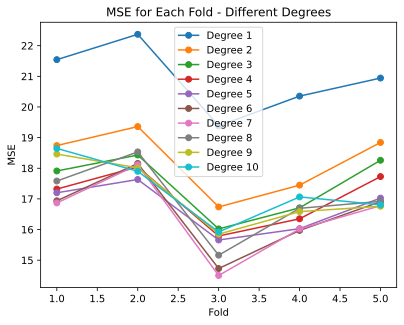

In [11]:
from sklearn.model_selection import KFold

# Convert DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Fitting features to polynomial regression and trying different degrees up to 10 to see which one gives the best results
max_deg = 10
best_mse = float('inf')
best_degree = 0

# Initialize empty lists to store average mean squared errors for each degree
mse_train_avg = []
mse_val_avg = []
mse_avg_across_folds = []

# Number of folds for k-fold cross-validation
k = 5
kfold = KFold(n_splits=k)

# Loop through degrees 1 to max_deg
for i in range(max_deg):
    mse_across_folds = []
    mse_train = []
    # Loop through the k folds
    for train_index, val_index in kfold.split(X_train_np):
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

        # Create polynomial features
        poly = PolynomialFeatures(degree=i+1)
        X_train_new = poly.fit_transform(X_train_fold)
        X_val_new = poly.transform(X_val_fold)

        # Train linear regression model
        lin_reg_model = LinearRegression()
        lin_reg_model.fit(X_train_new, y_train_fold)

        # Make predictions and calculate mean squared error
        pred_train = lin_reg_model.predict(X_train_new)
        pred_val = lin_reg_model.predict(X_val_new)
        mse_train.append(mean_squared_error(pred_train, y_train_fold))
        mse_across_folds.append(mean_squared_error(pred_val, y_val_fold))

    # Calculate average mean squared errors for the current degree
    mse_train_avg.append(np.mean(mse_train))
    mse_avg_across_folds.append(np.mean(mse_across_folds))

    # Find the best degree with minimum validation MSE
    best_degree = np.argmin(mse_avg_across_folds) + 1

    # Plot the MSE for each fold at the current degree
    plt.plot(range(1, k+1), mse_across_folds, marker='o', label=f'Degree {i+1}')


plt.legend()
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE for Each Fold - Different Degrees')
plt.show()

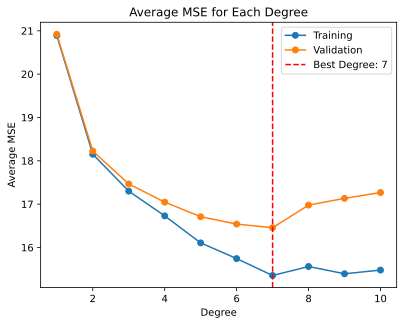

In [12]:
# Plot the average MSE for each degree on the training set and across the folds
plt.plot(range(1, max_deg+1), mse_train_avg, marker='o', label='Training')
plt.plot(range(1, max_deg+1), mse_avg_across_folds, marker='o', label='Validation')
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best Degree: {best_degree}')
plt.xlabel('Degree')
plt.ylabel('Average MSE')
plt.title('Average MSE for Each Degree')
plt.legend()
plt.show()

In [13]:
poly=PolynomialFeatures(best_degree)
X_train_new = poly.fit_transform(X_train) 
X_test_new = poly.fit_transform(X_test)

opt_lin_reg_model = LinearRegression()

opt_lin_reg_model.fit(X_train_new, y_train)
pred_test = opt_lin_reg_model.predict(X_test_new)
pred_train = opt_lin_reg_model.predict(X_train_new)

mse_opt_lin_reg = mean_squared_error(pred_test, y_test)
r2_opt_lin_reg = r2_score(y_test,pred_test)

train_mse_opt_lin_reg = mean_squared_error(pred_train, y_train)
train_r2_opt_lin_reg = r2_score(y_train,pred_train)

print(f"R2 Score for the optimised linear regression model is {r2_opt_lin_reg}")
print(f"MSE for the optimised linear regression model is {mse_opt_lin_reg}")


R2 Score for the optimised linear regression model is 0.9445386104348246
MSE for the optimised linear regression model is 16.087018620350904


### Decision Tree Regression Model Optimisation
There are many hyperparameters that can be modified when creating a decision tree model that include the following. **Criterion:** This is the calculation that is used to determine how the data is split at each node. The most common is MSE (previously explained). This performance will also be tested with: Friedman MSE, Absolute Error and Poisson criterions. *Max Depth:* is common to other implementations of decisions trees and refers to how deep the tree is (from the root node to the leaf node). A deeper tree can describe a more complex relationship but can also lead to overfitting to the training data. **Min Samples Split:** alters the number of samples to generate a split, this can again be adjusted to avoid overfitting. For this model the best combination of these will be found and chosen. In order to find the best combination of these parameters the GridSearchCV module from Sklearn is used. Grid search is an approach in which an exhaustive search is performed across a given set of hyperparameter options along with cross-validation to see which combinations work best. In this case the parameters that will be tested are: max depth: [2, 4, 6, 8, 10], min samples split: [2, 4, 6, 8, 10] and criterion: [’squared error’, ’friedman mse’, ’absolute error’, ’poisson’]. As with K-Fold validation datasets are created from the training data, in this case I will use 10 folds. The top 3 results and their parameters are shown in Table 1, the full table can be seen in the code. The top parameters shown in the table will be used for the optimised model.

In [14]:
# Use grid search to find the best parameters for the decision tree regressor
# Define the range of hyperparameters to test over
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

grid_search = GridSearchCV(dt_reg_model, param_grid, cv=10, n_jobs=-1)

# Train the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10}


In [15]:
# Show the results of the grid search
cv_results = grid_search.cv_results_
results_df = pd.DataFrame(cv_results)
# split the array params column into separate columns for each hyperparameter
results_df = pd.concat([results_df.drop(['params'], axis=1), results_df['params'].apply(pd.Series)], axis=1)
# remove the time columns and param_criterion,param_max_depth and param_min_samples_split columns
results_df = results_df.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_split'], axis=1)
# sort by mean_test_score
results_df = results_df.sort_values(by=['mean_test_score'], ascending=False)
results_df

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,criterion,max_depth,min_samples_split
24,0.946112,0.935089,0.933319,0.941487,0.943814,0.950268,0.944041,0.945352,0.931045,0.947513,0.941804,0.006143,1,squared_error,10,10
48,0.946837,0.934664,0.932326,0.942035,0.943953,0.949521,0.943060,0.945438,0.931338,0.947633,0.941681,0.006233,2,friedman_mse,10,8
49,0.946015,0.934800,0.933658,0.938814,0.943862,0.950600,0.944041,0.945352,0.930998,0.947513,0.941565,0.006246,3,friedman_mse,10,10
23,0.946498,0.934842,0.933024,0.939041,0.944007,0.949480,0.943060,0.945269,0.931692,0.947641,0.941456,0.006064,4,squared_error,10,8
47,0.946838,0.934483,0.932096,0.938507,0.943978,0.948184,0.942389,0.944975,0.931289,0.947291,0.941003,0.006117,5,friedman_mse,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.020333,0.013343,0.010029,0.008645,0.035733,0.035049,0.014987,0.029780,0.030017,0.014463,0.021238,0.009916,96,poisson,2,6
76,0.020333,0.013343,0.010029,0.008645,0.035733,0.035049,0.014987,0.029780,0.030017,0.014463,0.021238,0.009916,97,poisson,2,4
75,0.020333,0.013343,0.010029,0.008645,0.035733,0.035049,0.014987,0.029780,0.030017,0.014463,0.021238,0.009916,98,poisson,2,2
79,0.020333,0.013343,0.010029,0.008645,0.035733,0.035049,0.014987,0.029780,0.030017,0.014463,0.021238,0.009916,99,poisson,2,10


In [16]:
opt_dt_reg_model = DecisionTreeRegressor(max_depth= grid_search.best_params_['max_depth'], criterion= grid_search.best_params_['criterion'], min_samples_split= grid_search.best_params_['min_samples_split'])

# Fitting the model
opt_dt_reg_model=opt_dt_reg_model.fit(X_train, y_train) 

# Predicting values for the test features
opt_dt_reg_ypred=opt_dt_reg_model.predict(X_test)
opt_dt_reg_ypred_train=opt_dt_reg_model.predict(X_train)

r2_opt_dt_reg = r2_score(y_test,opt_dt_reg_ypred)
r2_opt_dt_reg_train = r2_score(y_train,opt_dt_reg_ypred_train)

mse_opt_dt_reg = mean_squared_error(y_test, opt_dt_reg_ypred)
mse_opt_dt_reg_train = mean_squared_error(y_train, opt_dt_reg_ypred_train)

print(f"R2 Score for the optimised decision tree regressor model is {r2_opt_dt_reg}")
print(f"MSE for the optimised decision tree regressor model is {mse_opt_dt_reg}")

R2 Score for the optimised decision tree regressor model is 0.9440990297586005
MSE for the optimised decision tree regressor model is 16.214522503304533


In [17]:
# create a table that shows the mse and r2 scores for the different models including the optimised models and the dummy model
models = ['Dummy', 'Linear Regression', 'Decision Tree Regressor', 'Polynomial Regression', 'Optimised Decision Tree Regressor']
r2_scores = [r2_dummy, r2_lin_reg_model, r2_dt_reg, r2_opt_lin_reg, r2_opt_dt_reg]
mse_scores = [mse_dummy, mse_lin_reg_model, mse_dt_reg, mse_opt_lin_reg, mse_opt_dt_reg]
results_df = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'MSE': mse_scores})

results_df

,Model,R2 Score,MSE
0,Dummy,-0.000376,290.166935
1,Linear Regression,0.930105,20.273706
2,Decision Tree Regressor,0.932716,19.516162
3,Polynomial Regression,0.944539,16.087019
4,Optimised Decision Tree Regressor,0.944099,16.214523


## Conclusions and Results
After using validation datasets to find optimal hyperparameters we can then use our test dataset that was created at the beginning to produce a test score for each model. This provides an unbiased estimate of each models performance on unseen data allowing for comparison. The results demonstrate that both optimisation techniques offered increased performance. The DTR pre-optimisation out performed the linear regression model. After optimisation the Polynomial regression model slightly outperforms the optimised DTR. Therefore the optimised Polynomial regression model would be the best candidate for real-world use. The good results here show there there is a significant relationship between the features and the target variables. 